## AKASH VARMA

## Project Title: 
Grapes to Greatness: Machine Learning in Wine Quality Prediction
## Description:
Predicting wine quality using machine learning is a common and valuable application in the 
field of data science and analytics. Wine quality prediction involves building a model that can 
assess and predict the quality of a wine based on various input features, such as chemical 
composition, sensory characteristics, and environmental factors. 



## Tasks:
Load the Dataset, 
Data preprocessing including visualization, 
Machine Learning Model building, 
Evaluate the model, 
Test with random observation

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [108]:
df=pd.read_csv(r"D:\MachineLearning\DataScienceCourse\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Checking null values

In [110]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [111]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Visualization

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '5'),
  Text(1, 0, '6'),
  Text(2, 0, '7'),
  Text(3, 0, '4'),
  Text(4, 0, '8'),
  Text(5, 0, '3')])

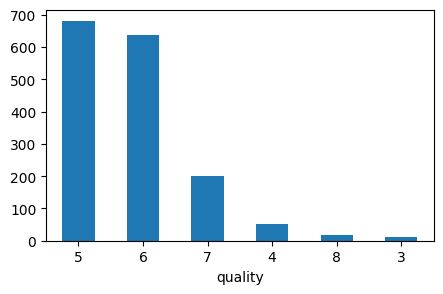

In [112]:
plt.figure(figsize=(5,3))
df["quality"].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

> Wines with quality '5' and '6' are more!!

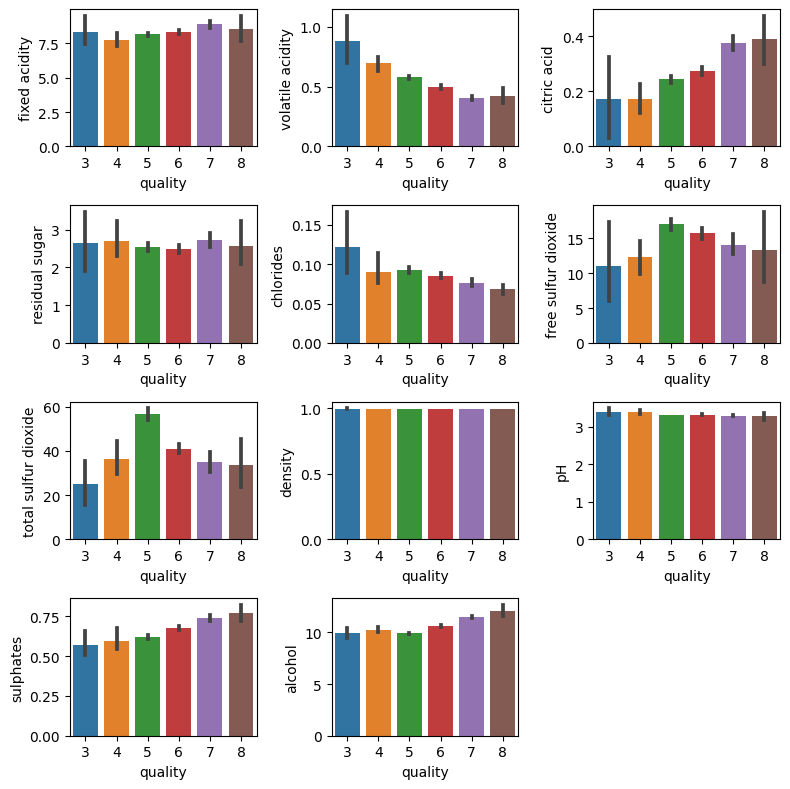

In [113]:
plt.figure(figsize=(8,8))
l=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
for i in l:
    plt.subplot(4, 3, l.index(i) + 1)   # 4 rows, 3 columns
    sns.barplot(x=df["quality"],y=df[i])
plt.tight_layout()

    
# sns.barplot(x=df["quality"],y=df["alcohol"])

## Correlation Check

<Axes: >

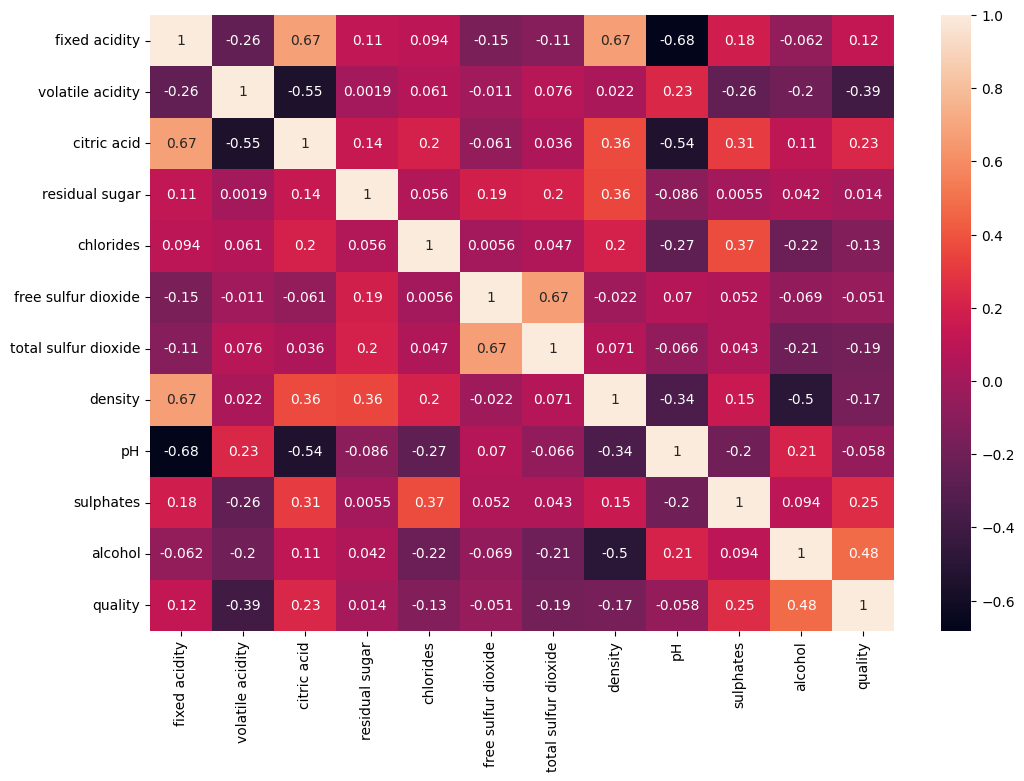

In [114]:
plt.figure(figsize=(12, 8))
cor=df.corr()
sns.heatmap(cor,annot=True)

> As we can see there is no such correlated features in the dataset

## Checking outliers

Text(0.5, 1.0, 'Box Plot of All Columns')

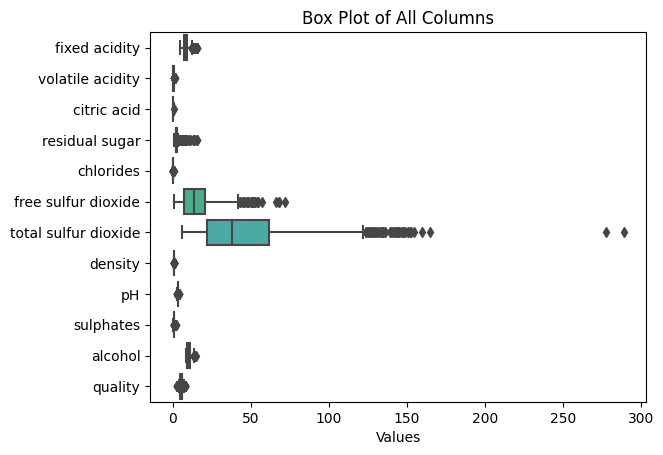

In [115]:
sns.boxplot(data=df, orient='h')  # 'orient' is set to 'h' for horizontal box plots

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

> There are so many outliers present in the dataset !

In [116]:
l1=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
for i in l:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upperL=q3+1.5*iqr
    lowerL=q1-1.5*iqr
    df[i]=np.where(df[i]>upperL,upperL,np.where(df[i]<lowerL,lowerL,df[i]))

Text(0.5, 1.0, 'Box Plot of All Columns')

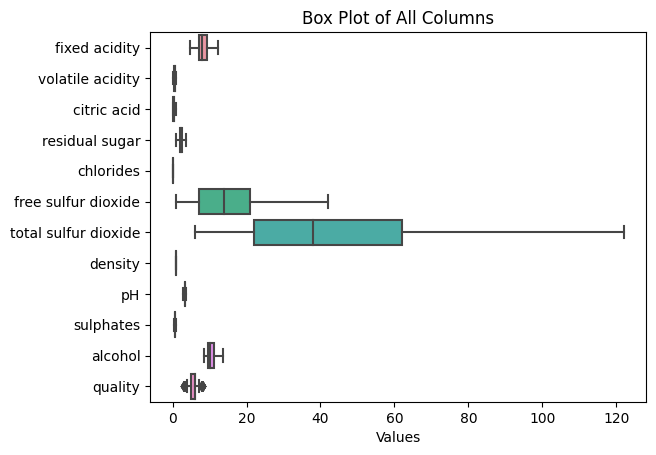

In [117]:
sns.boxplot(data=df, orient='h')  # 'orient' is set to 'h' for horizontal box plots

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Splitting the data into dependent and independent variables

In [119]:
x=df.iloc[:,:11]
y=df.iloc[:,-1]
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: quality
Non-Null Count  Dtype
--------------  -----
1599 non-null   int64
dtypes: int64(1)
memory usag

## Train, Test, Split

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

## Model Training

## KNN Classifier

In [121]:
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.46      0.58      0.51       120
           6       0.54      0.44      0.48       146
           7       0.38      0.30      0.33        40
           8       0.00      0.00      0.00         5

    accuracy                           0.46       320
   macro avg       0.23      0.22      0.22       320
weighted avg       0.47      0.46      0.46       320

[[ 0  0  1  0  0  0]
 [ 2  0  3  2  1  0]
 [ 0  6 70 37  7  0]
 [ 1  9 62 64 10  0]
 [ 0  0 15 13 12  0]
 [ 0  0  1  2  2  0]]


C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Logistic Regression

In [122]:
model2=LogisticRegression(max_iter=5000)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.60      0.77      0.67       120
           6       0.55      0.56      0.56       146
           7       0.41      0.17      0.25        40
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.26      0.25      0.25       320
weighted avg       0.53      0.57      0.54       320

[[ 0  0  1  0  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0 92 28  0  0]
 [ 0  0 57 82  7  0]
 [ 0  0  2 31  7  0]
 [ 0  0  0  2  3  0]]


C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Decision Tree Classifier

In [123]:
model3=DecisionTreeClassifier()
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.12      0.12         8
           5       0.62      0.75      0.68       120
           6       0.66      0.53      0.59       146
           7       0.36      0.40      0.38        40
           8       0.20      0.20      0.20         5

    accuracy                           0.58       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.59      0.58      0.58       320

[[ 0  0  0  1  0  0]
 [ 1  1  3  2  1  0]
 [ 1  4 90 22  3  0]
 [ 0  3 45 77 21  0]
 [ 0  0  7 13 16  4]
 [ 0  0  0  1  3  1]]


## Accuracy Check

In [124]:
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred1)*100)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred2)*100)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred3)*100)

KNN Classifier Accuracy: 45.625
Logistic Regression Accuracy: 56.56250000000001
Decision Tree Accuracy: 57.8125


## Predicting with random values

In [125]:
sample_check=[[6.5, 0.6, 0.3, 2.2, 0.07, 15.0, 40.0, 0.996, 3.4, 0.6, 9.5],
             [8.0, 0.4, 0.4, 2.8, 0.085, 22.0, 55.0, 0.998, 3.2, 0.55, 11.2],
             [6.8, 0.55, 0.15, 2.4, 0.075, 25.0, 62.0, 0.9962, 3.1, 0.75, 9.0],
             [7.5, 0.45, 0.35, 2.5, 0.09, 30.0, 70.0, 0.9978, 3.5, 0.6, 11.5],
             [7.0, 0.5, 0.2, 2.5, 0.08, 20.0, 60.0, 0.997, 3.3, 0.7, 10.0]
             ]

for i in sample_check:
    x=model2.predict([i])
    if(x>=6):
        print(x, "--> Good" )
    elif(x<6):
        print(x, "--> Not Good")

[5] --> Not Good
[6] --> Good
[5] --> Not Good
[6] --> Good
[5] --> Not Good


C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, 